In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [278]:
captions = []
ground_truth = []
predicted = []
confidence_scores = []
inference_time_list = []
candidates = []
entities = []

result_dir = 'F:\Thesis\DKH-Thesis\\result_t2'
result_json_list = os.listdir(result_dir)
for item in result_json_list:
    try:
        result_json_dir = os.path.join(result_dir, item)
        with open(result_json_dir, 'r') as f:
            result_json = json.load(f)
            captions.append(result_json['caption'])
            ground_truth.append(result_json['ground_truth'])
            predicted.append(1 if result_json['final_result']['OOC'] else 0)
            confidence_scores.append(result_json['final_result']['confidence_score'])
            inference_time_list.append(result_json['inference_time'])
            candidates.append(result_json['external_check']['candidates'])
            entities.append(result_json['internal_check']['textual_entities'])
    except Exception as e:
        print(e)

'caption'
Expecting value: line 18 column 20 (char 415)
Expecting value: line 39 column 20 (char 836)
Expecting value: line 31 column 20 (char 632)
Expecting value: line 41 column 20 (char 1374)
Expecting value: line 16 column 20 (char 447)
Expecting value: line 36 column 20 (char 6927)
Expecting value: line 61 column 20 (char 8190)
Expecting value: line 18 column 20 (char 504)
Expecting value: line 18 column 20 (char 504)
Expecting value: line 53 column 20 (char 23628)
Expecting value: line 182 column 20 (char 49893)
Expecting value: line 77 column 20 (char 17554)
Expecting value: line 18 column 20 (char 444)
Expecting value: line 111 column 20 (char 2116)
Expecting value: line 88 column 20 (char 45674)
Expecting value: line 53 column 24 (char 4244)
Expecting value: line 18 column 20 (char 415)
Expecting value: line 39 column 20 (char 1171)
Expecting value: line 54 column 20 (char 4408)
Expecting value: line 31 column 20 (char 648)
Expecting value: line 18 column 20 (char 490)
Expecti

In [279]:
print(len(captions))
print(len(ground_truth))
print(len(predicted))
print(len(inference_time_list))
print(len(candidates))
print(len(entities))

901
901
901
901
901
901


In [280]:
df = pd.DataFrame({
    'caption': captions,
    'ground_truth': ground_truth,
    'predicted': predicted,
    'confidence_score': confidence_scores,
    'inference_time': inference_time_list,
    'candidates': candidates,
    'entities': entities
})
df['adjusted_predicted'] = df.apply(
    lambda row: row['predicted'] if row['confidence_score'] >= 5 else 1 - row['predicted'], axis=1
)
adjusted_predicted = df['adjusted_predicted'].tolist()
df

,caption,ground_truth,predicted,confidence_score,inference_time,candidates,entities,adjusted_predicted
0,"Hillary Clinton was ""'on trial' for Benghazi"" ...",1,1,10,36.452961,"[{'authors': ['David Mikkelson'], 'title': 'Wa...","[{'entity': 'B-LOC', 'word': 'Washington'}, {'...",1
1,The picture dated from World War II and captur...,1,1,3,44.290912,[],"[{'entity': 'B-MISC', 'word': 'Algerian'}, {'e...",0
2,South Korean performers dressed as soldiers pa...,0,0,6,1499.121685,[],"[{'entity': 'B-MISC', 'word': 'Korean'}, {'ent...",0
3,A juvenile male humpback whale in waters off S...,1,0,3,57.466695,[],[],1
4,"President Trump's second wife, Marla Maples, d...",1,1,10,60.031098,"[{'authors': ['Kim LaCapria'], 'title': 'Did M...","[{'entity': 'B-PER', 'word': 'Trump'}, {'entit...",1
...,...,...,...,...,...,...,...,...
896,A white woman named Ricky Ellsworth was killed...,1,1,10,65.342357,"[{'authors': ['Dan Evon'], 'title': 'Is This '...","[{'entity': 'B-LOC', 'word': 'U'}, {'entity': ...",1
897,Donald Trump revoked the press credentials of ...,1,1,2,54.707209,[],[],0
898,Mike Potter took this photograph at Littlehamp...,0,0,3,69.973193,[],[],1
899,Press assembly lines inside the Dasung factory.,0,1,2,17.861881,[],"[{'entity': 'B-PER', 'word': 'Moon'}, {'entity...",0


In [281]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

class_names = ["NOOC", "OOC"]

# Generate Classification Report
report = classification_report(ground_truth, predicted, target_names=class_names)
print("\nClassification Report:")
print(report)
print("################################")

# calculate per-class accuracy
cm = confusion_matrix(ground_truth, predicted)
class_accuracies = cm.diagonal() / cm.sum(axis=1)
print("Per-Class Accuracy:")
for class_name, acc in zip(class_names, class_accuracies):
    print(f"{class_name}: {acc:.4f}")
print("################################")

# Calculate average inference time
average_time = sum(inference_time_list) / len(inference_time_list)
print(f"Average Inference Time: {average_time:.6f} seconds")


Classification Report:
              precision    recall  f1-score   support

        NOOC       0.82      0.81      0.81       470
         OOC       0.79      0.81      0.80       431

    accuracy                           0.81       901
   macro avg       0.81      0.81      0.81       901
weighted avg       0.81      0.81      0.81       901

################################
Per-Class Accuracy:
NOOC: 0.8064
OOC: 0.8051
################################
Average Inference Time: 51.504413 seconds


In [282]:
cm

array([[379,  91],
       [ 84, 347]], dtype=int64)

# Analyze the incorrect cases


Incorrect Cases Analysis:
Total cases: 901
Number of incorrect predictions: 212
Error rate: 23.53%


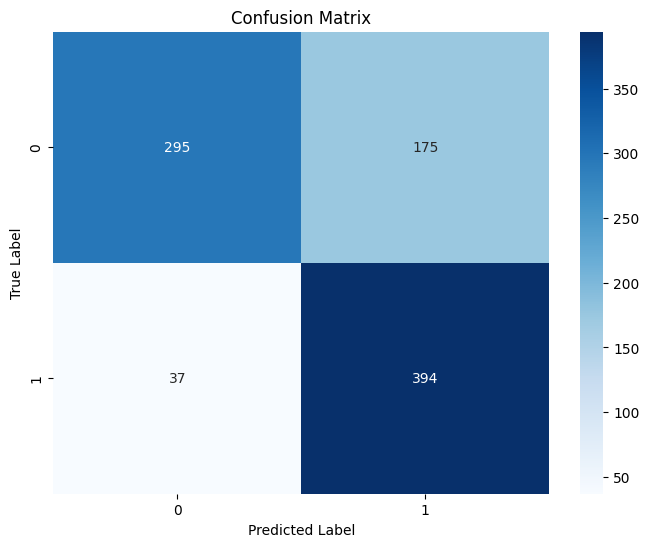


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       470
           1       0.69      0.91      0.79       431

    accuracy                           0.76       901
   macro avg       0.79      0.77      0.76       901
weighted avg       0.79      0.76      0.76       901


Confidence Score Analysis for Incorrect Predictions:
Mean confidence score: 4.491
Median confidence score: 3.000
Min confidence score: 1.000
Max confidence score: 10.000


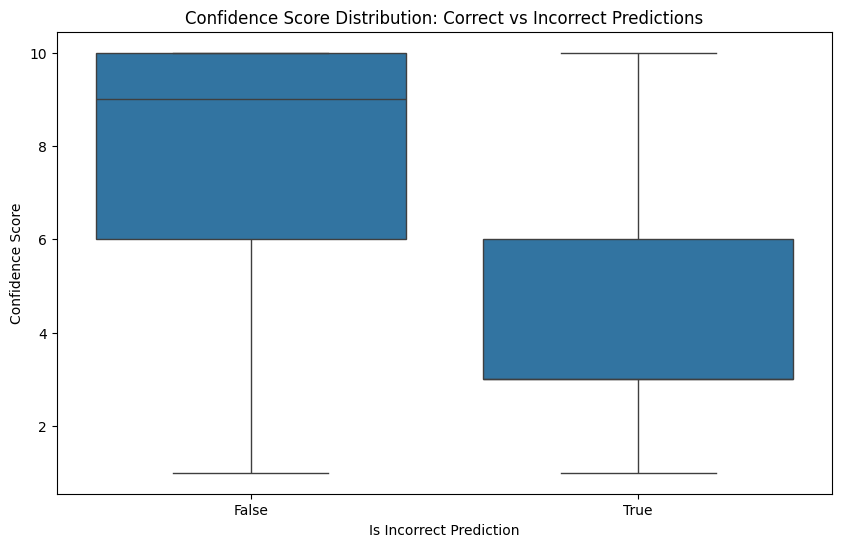


Detailed Analysis of Incorrect Cases:

False Positives (Predicted OOC when it wasn't):
                                                                                                                                                                                                                                                                          caption  confidence_score  inference_time
6                                                                                                                                                                Women are separated by dividers as they have their hair washed in Bella Rinova hair salon in Houston, Texas, US.                 3       39.842221
14                                                                                                                                                                                 The Yorkshire Sculpture Park, just before the last lockdown on the last permitted family trip.                 3     

C:\Users\phanh\AppData\Local\Temp\ipykernel_33716\4280273480.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_cases['confidence_range'] = pd.cut(incorrect_cases['confidence_score'],


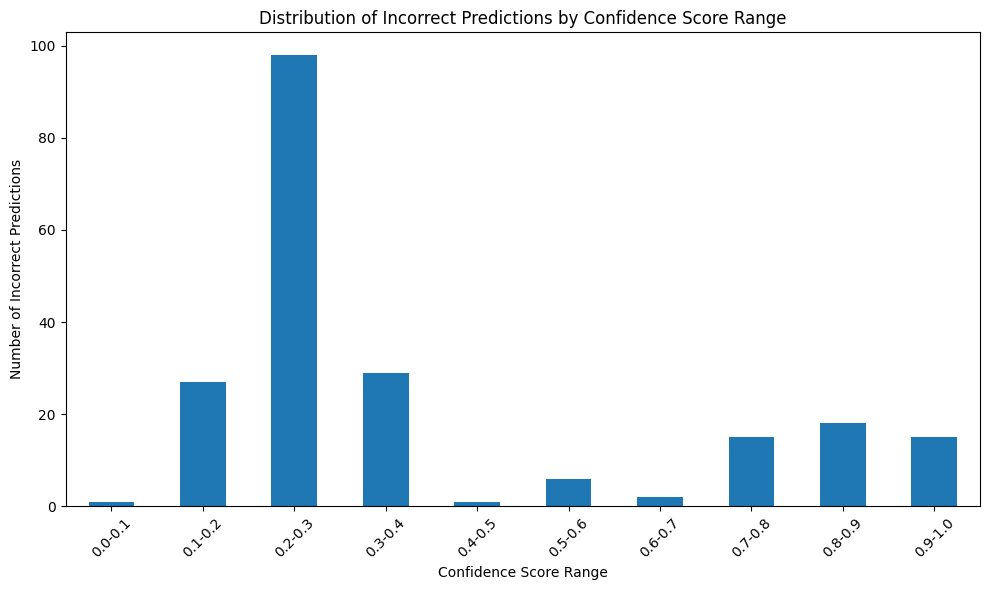

In [283]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify incorrect predictions
df['is_incorrect'] = df['ground_truth'] != df['predicted']
incorrect_cases = df[df['is_incorrect']]

# Calculate and print basic statistics
print("\nIncorrect Cases Analysis:")
print(f"Total cases: {len(df)}")
print(f"Number of incorrect predictions: {len(incorrect_cases)}")
print(f"Error rate: {(len(incorrect_cases) / len(df) * 100):.2f}%")

# Generate confusion matrix
cm = confusion_matrix(df['ground_truth'], df['predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(df['ground_truth'], df['predicted']))

# Analyze confidence scores for incorrect predictions
print("\nConfidence Score Analysis for Incorrect Predictions:")
print(f"Mean confidence score: {incorrect_cases['confidence_score'].mean():.3f}")
print(f"Median confidence score: {incorrect_cases['confidence_score'].median():.3f}")
print(f"Min confidence score: {incorrect_cases['confidence_score'].min():.3f}")
print(f"Max confidence score: {incorrect_cases['confidence_score'].max():.3f}")

# Distribution of confidence scores for correct vs incorrect predictions
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_incorrect', y='confidence_score', data=df)
plt.title('Confidence Score Distribution: Correct vs Incorrect Predictions')
plt.xlabel('Is Incorrect Prediction')
plt.ylabel('Confidence Score')
plt.show()

# Detailed analysis of incorrect cases
print("\nDetailed Analysis of Incorrect Cases:")
print("\nFalse Positives (Predicted OOC when it wasn't):")
false_positives = incorrect_cases[incorrect_cases['predicted'] > incorrect_cases['ground_truth']]
if len(false_positives) > 0:
    print(false_positives[['caption', 'confidence_score', 'inference_time']].to_string())

print("\nFalse Negatives (Failed to predict OOC when it was):")
false_negatives = incorrect_cases[incorrect_cases['predicted'] < incorrect_cases['ground_truth']]
if len(false_negatives) > 0:
    print(false_negatives[['caption', 'confidence_score', 'inference_time']].to_string())

# Analysis of inference time for incorrect cases
print("\nInference Time Analysis for Incorrect Cases:")
print(f"Mean inference time: {incorrect_cases['inference_time'].mean():.3f}")
print(f"Median inference time: {incorrect_cases['inference_time'].median():.3f}")
print(f"Min inference time: {incorrect_cases['inference_time'].min():.3f}")
print(f"Max inference time: {incorrect_cases['inference_time'].max():.3f}")

# Optional: Save incorrect cases to CSV for further analysis
incorrect_cases.to_csv('incorrect_predictions.csv', index=False)

# Word frequency analysis in captions of incorrect cases
from collections import Counter
import re

def get_word_frequencies(text_list):
    words = []
    for text in text_list:
        # Convert to lowercase and split into words
        text_words = re.findall(r'\w+', text.lower())
        words.extend(text_words)
    return Counter(words)

print("\nMost Common Words in Incorrect Predictions:")
incorrect_words = get_word_frequencies(incorrect_cases['caption'])
print("\nTop 20 most frequent words in incorrect predictions:")
for word, count in incorrect_words.most_common(20):
    print(f"{word}: {count}")

# Visualization of incorrect cases by confidence score ranges
plt.figure(figsize=(10, 6))
incorrect_cases['confidence_range'] = pd.cut(incorrect_cases['confidence_score'], 
                                           bins=10, 
                                           labels=[f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 1, 0.1)])
confidence_range_counts = incorrect_cases['confidence_range'].value_counts().sort_index()
confidence_range_counts.plot(kind='bar')
plt.title('Distribution of Incorrect Predictions by Confidence Score Range')
plt.xlabel('Confidence Score Range')
plt.ylabel('Number of Incorrect Predictions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Candidate Analysis for Incorrect Cases:
Total incorrect cases: 212

Cases with candidates: 0
Cases without candidates: 212

Number of candidates statistics:
Mean candidates per case: 0.00
Median candidates per case: 0.00
Max candidates per case: 0

Top source domains in incorrect cases:

Confidence scores by number of candidates:
                mean  count   std
num_candidates                   
0               4.49    212  2.61


C:\Users\phanh\AppData\Local\Temp\ipykernel_33716\226287315.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_cases['num_candidates'] = incorrect_cases['candidate_analysis'].apply(lambda x: x['num_candidates'])


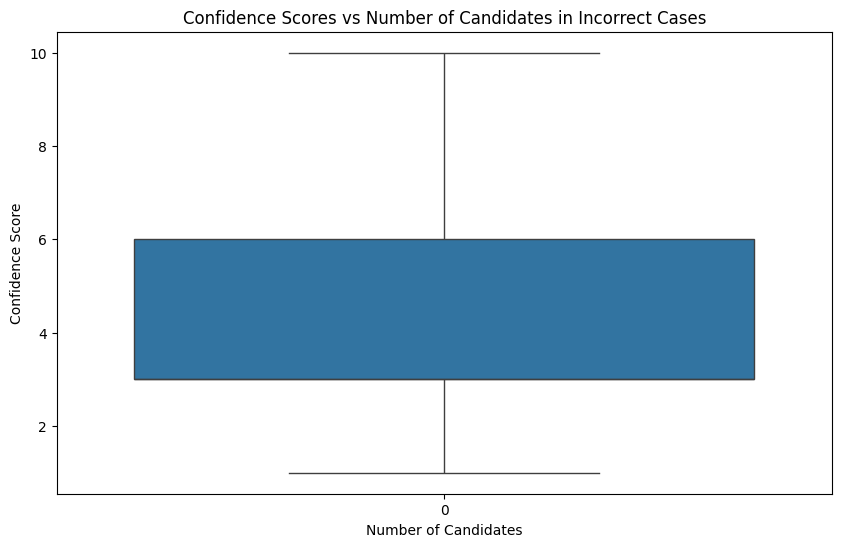

In [284]:
# Add analysis of candidates for incorrect cases
def analyze_candidates(row):
    candidates = row.get('external_check', {}).get('candidates', [])
    return {
        'num_candidates': len(candidates),
        'has_candidates': len(candidates) > 0,
        'source_domains': [c.get('source_domain', '') for c in candidates],
        'dates': [c.get('date', '') for c in candidates],
        'languages': [c.get('language', '') for c in candidates]
    }

# Create a function to analyze incorrect cases with their candidates
def analyze_incorrect_with_candidates(df):
    # Add candidate analysis to each row
    df['candidate_analysis'] = df.apply(lambda x: analyze_candidates(x), axis=1)
    
    # Extract candidate information
    incorrect_cases = df[df['is_incorrect']]
    
    print("\nCandidate Analysis for Incorrect Cases:")
    print(f"Total incorrect cases: {len(incorrect_cases)}")
    
    # Count cases with/without candidates
    has_candidates = incorrect_cases['candidate_analysis'].apply(lambda x: x['has_candidates'])
    print(f"\nCases with candidates: {sum(has_candidates)}")
    print(f"Cases without candidates: {sum(~has_candidates)}")
    
    # Analyze number of candidates
    num_candidates = incorrect_cases['candidate_analysis'].apply(lambda x: x['num_candidates'])
    print("\nNumber of candidates statistics:")
    print(f"Mean candidates per case: {num_candidates.mean():.2f}")
    print(f"Median candidates per case: {num_candidates.median():.2f}")
    print(f"Max candidates per case: {num_candidates.max()}")
    
    # Analyze source domains
    all_domains = []
    for analysis in incorrect_cases['candidate_analysis']:
        all_domains.extend(analysis['source_domains'])
    domain_counts = Counter(all_domains)
    
    print("\nTop source domains in incorrect cases:")
    for domain, count in domain_counts.most_common(5):
        print(f"{domain}: {count}")
    
    # Analyze dates if available
    all_dates = []
    for analysis in incorrect_cases['candidate_analysis']:
        all_dates.extend([d for d in analysis['dates'] if d])
    
    if all_dates:
        dates_df = pd.DataFrame({'dates': all_dates})
        dates_df['dates'] = pd.to_datetime(dates_df['dates'])
        print("\nDate range of candidates:")
        print(f"Earliest date: {dates_df['dates'].min()}")
        print(f"Latest date: {dates_df['dates'].max()}")
    
    # Analyze confidence scores based on number of candidates
    print("\nConfidence scores by number of candidates:")
    incorrect_cases['num_candidates'] = incorrect_cases['candidate_analysis'].apply(lambda x: x['num_candidates'])
    candidate_groups = incorrect_cases.groupby('num_candidates')['confidence_score']
    print(candidate_groups.agg(['mean', 'count', 'std']).round(2))
    
    # Visualize confidence scores vs number of candidates
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='num_candidates', y='confidence_score', data=incorrect_cases)
    plt.title('Confidence Scores vs Number of Candidates in Incorrect Cases')
    plt.xlabel('Number of Candidates')
    plt.ylabel('Confidence Score')
    plt.show()
    
    return incorrect_cases

# Run the analysis
incorrect_with_candidates = analyze_incorrect_with_candidates(df)

# Save detailed analysis to CSV
incorrect_with_candidates.to_csv('incorrect_cases_with_candidates.csv', index=False)

=== Candidate Analysis ===

Average number of candidates per image: 0.99

Distribution of candidate counts:
candidates
0    397
1    294
2    100
3     70
4     21
5     11
6      5
7      2
8      1
Name: count, dtype: int64

Accuracy by number of candidates:
Candidates: 0, Accuracy: 0.6247
Candidates: 1, Accuracy: 0.8673
Candidates: 2, Accuracy: 0.8500
Candidates: 3, Accuracy: 0.9286
Candidates: 4, Accuracy: 0.8571
Candidates: 5, Accuracy: 1.0000
Candidates: 6, Accuracy: 0.8000
Candidates: 7, Accuracy: 1.0000
Candidates: 8, Accuracy: 1.0000

Top 10 most common candidates:
{'authors': ['Bethania Palma'], 'title': 'Ted Nugent Death Hoax', 'date': '2017-04-28T10:07:43', 'content': 'Claim:
Ted Nugent was killed in a Montana hunting accident.
On 28 April 2017, a number of unreliable web sites began publishing stories reporting that rock musician and conservative icon Ted Nugent had been killed in a hunting accident in Montana:
Ted Nugent, 70’s rocker turned hunting guide and conservative 

f:\Thesis\DKH-Thesis\venv\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
f:\Thesis\DKH-Thesis\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


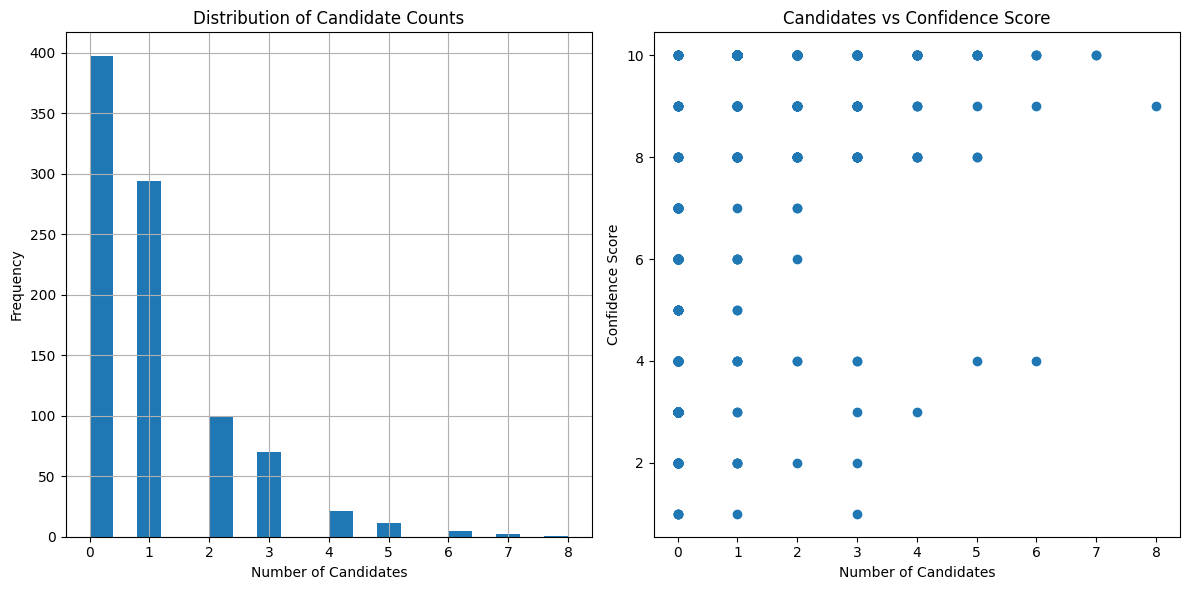


=== Analysis of Incorrect Predictions ===

Number of incorrect predictions: 212
Average candidates in incorrect predictions: 0.48
Average candidates in correct predictions: 1.15

Most common candidates in incorrect predictions:
{'authors': ['Lauren Fox'], 'title': 'Mnuchin defies House Democrats’ subpoenas for Trump’s tax returns', 'date': '2019-05-17T20:21:59', 'content': 'Treasury Secretary Steve Mnuchin on Friday defied subpoenas from House Ways and Means Committee Chairman Richard Neal for President Donald Trump’s tax returns.
In a new letter, Mnuchin again says the request “lacks a legitimate legislative purpose” and that he is “not authorized to disclose the requested returns and return information.”
The denial is not a surprise. The Trump administration already turned down Neal’s April request for six years of tax information about the President’s personal and business finances.
But, the disregard for the subpoena brings into sharper focus the eventual court fight and raises qu

In [285]:
# First, let's analyze the basic statistics of candidates
def analyze_candidates(df):
    # 1. Calculate average number of candidates per image
    avg_candidates = df['candidates'].apply(len).mean()
    
    # 2. Distribution of candidate counts
    candidate_counts = df['candidates'].apply(len)
    
    # 3. Analyze relationship between number of candidates and prediction accuracy
    df['num_candidates'] = df['candidates'].apply(len)
    accuracy_by_candidate_count = {}
    
    for count in df['num_candidates'].unique():
        mask = df['num_candidates'] == count
        subset = df[mask]
        accuracy = accuracy_score(subset['ground_truth'], subset['predicted'])
        accuracy_by_candidate_count[count] = accuracy
    
    # 4. Analyze most common candidates
    all_candidates = []
    for candidate_list in df['candidates']:
        all_candidates.extend(candidate_list)
    
    candidate_frequency = pd.Series(all_candidates).value_counts()
    
    # 5. Analyze relationship between candidate count and confidence score
    correlation = df['num_candidates'].corr(df['confidence_score'])
    
    # Print results
    print("=== Candidate Analysis ===")
    print(f"\nAverage number of candidates per image: {avg_candidates:.2f}")
    
    print("\nDistribution of candidate counts:")
    print(candidate_counts.value_counts().sort_index())
    
    print("\nAccuracy by number of candidates:")
    for count, acc in sorted(accuracy_by_candidate_count.items()):
        print(f"Candidates: {count}, Accuracy: {acc:.4f}")
    
    print("\nTop 10 most common candidates:")
    print(candidate_frequency.head(10))
    
    print(f"\nCorrelation between candidate count and confidence score: {correlation:.4f}")
    
    # 6. Additional analysis: Success rate for different candidate count ranges
    df['candidate_range'] = pd.cut(df['num_candidates'], 
                                 bins=[0, 2, 5, 10, float('inf')],
                                 labels=['1-2', '3-5', '6-10', '10+'])
    
    print("\nAccuracy by candidate range:")
    for range_label in df['candidate_range'].unique():
        mask = df['candidate_range'] == range_label
        subset = df[mask]
        accuracy = accuracy_score(subset['ground_truth'], subset['predicted'])
        print(f"Range {range_label}: {accuracy:.4f} (n={len(subset)})")

    # 7. Visualization of results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    candidate_counts.hist(bins=20)
    plt.title('Distribution of Candidate Counts')
    plt.xlabel('Number of Candidates')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.scatter(df['num_candidates'], df['confidence_score'])
    plt.title('Candidates vs Confidence Score')
    plt.xlabel('Number of Candidates')
    plt.ylabel('Confidence Score')
    
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_candidates(df)

# Additional analysis for incorrect predictions
print("\n=== Analysis of Incorrect Predictions ===")
incorrect_mask = df['ground_truth'] != df['predicted']
incorrect_predictions = df[incorrect_mask]

print(f"\nNumber of incorrect predictions: {len(incorrect_predictions)}")
print(f"Average candidates in incorrect predictions: {incorrect_predictions['num_candidates'].mean():.2f}")
print(f"Average candidates in correct predictions: {df[~incorrect_mask]['num_candidates'].mean():.2f}")

# Analyze candidate patterns in incorrect predictions
print("\nMost common candidates in incorrect predictions:")
incorrect_candidates = []
for candidate_list in incorrect_predictions['candidates']:
    incorrect_candidates.extend(candidate_list)
    
incorrect_candidate_freq = pd.Series(incorrect_candidates).value_counts()
print(incorrect_candidate_freq.head(10))

=== Detailed Analysis of Incorrect Predictions ===

Total number of incorrect predictions: 212 out of 901 total cases
Error rate: 23.53%

Breakdown of Error Types:
False Positives (predicted OOC when actually NOOC): 175
False Negatives (predicted NOOC when actually OOC): 37

Confidence Score Analysis for Incorrect Predictions:
Mean confidence score for incorrect predictions: 4.49
Mean confidence score for correct predictions: 7.92

Candidate Analysis for Incorrect Predictions:
Average number of candidates in incorrect cases: 0.48

Distribution of candidate counts in incorrect cases:
num_candidates
0    149
1     39
2     15
3      5
4      3
6      1
Name: count, dtype: int64


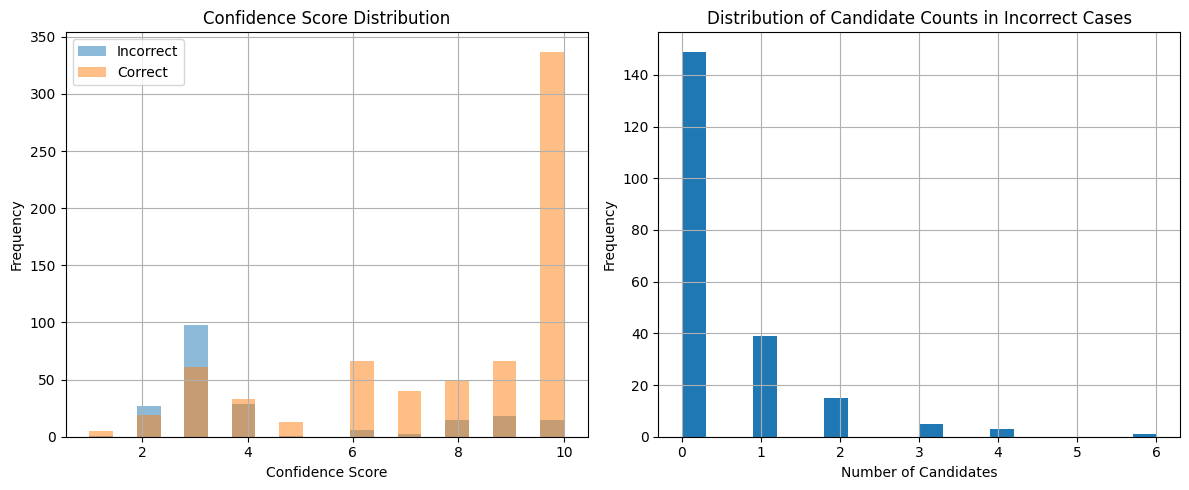


Most Common Candidates in Incorrect Predictions:
{'authors': ['Lauren Fox'], 'title': 'Mnuchin defies House Democrats’ subpoenas for Trump’s tax returns', 'date': '2019-05-17T20:21:59', 'content': 'Treasury Secretary Steve Mnuchin on Friday defied subpoenas from House Ways and Means Committee Chairman Richard Neal for President Donald Trump’s tax returns.
In a new letter, Mnuchin again says the request “lacks a legitimate legislative purpose” and that he is “not authorized to disclose the requested returns and return information.”
The denial is not a surprise. The Trump administration already turned down Neal’s April request for six years of tax information about the President’s personal and business finances.
But, the disregard for the subpoena brings into sharper focus the eventual court fight and raises questions about what Neal might do next.
The Ways and Means Chairman said he was consulting with counsel about “moving forward.”
“Issuance of these subpoenas should not have been ne

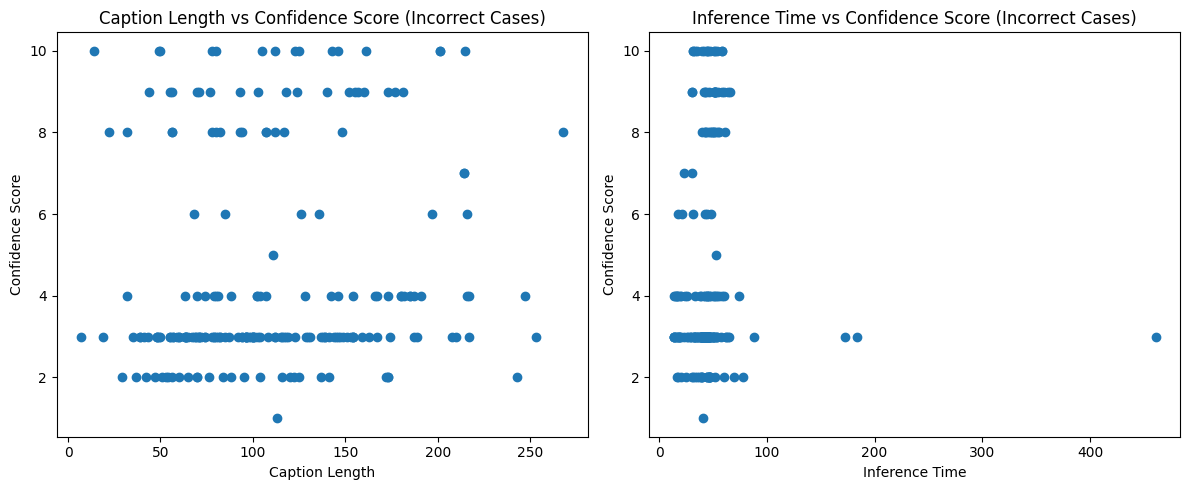


Error Rate by Confidence Score Range:
Confidence 0-4: 59.72% (126/211)
Confidence 4-6: 39.47% (30/76)
Confidence 6-8: 7.02% (8/114)
Confidence 8-10: 22.30% (33/148)

=== Analysis of Error Patterns ===
Number of consecutive errors: 40
Longest streak of consecutive errors: 4

Analysis of consecutive error cases:
Average confidence score: 4.97
Average number of candidates: 0.57


In [286]:
def analyze_incorrect_cases(df):
    # Create mask for incorrect predictions
    incorrect_mask = df['ground_truth'] != df['predicted']
    incorrect_df = df[incorrect_mask].copy()
    
    print("=== Detailed Analysis of Incorrect Predictions ===")
    print(f"\nTotal number of incorrect predictions: {len(incorrect_df)} out of {len(df)} total cases")
    print(f"Error rate: {(len(incorrect_df) / len(df) * 100):.2f}%")
    
    # 1. Analyze false positives and false negatives separately
    fp_mask = (df['ground_truth'] == 0) & (df['predicted'] == 1)
    fn_mask = (df['ground_truth'] == 1) & (df['predicted'] == 0)
    
    false_positives = df[fp_mask]
    false_negatives = df[fn_mask]
    
    print("\nBreakdown of Error Types:")
    print(f"False Positives (predicted OOC when actually NOOC): {len(false_positives)}")
    print(f"False Negatives (predicted NOOC when actually OOC): {len(false_negatives)}")
    
    # 2. Confidence Score Analysis for Incorrect Cases
    print("\nConfidence Score Analysis for Incorrect Predictions:")
    print(f"Mean confidence score for incorrect predictions: {incorrect_df['confidence_score'].mean():.2f}")
    print(f"Mean confidence score for correct predictions: {df[~incorrect_mask]['confidence_score'].mean():.2f}")
    
    # Distribution of confidence scores for incorrect cases
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    incorrect_df['confidence_score'].hist(bins=20, alpha=0.5, label='Incorrect')
    df[~incorrect_mask]['confidence_score'].hist(bins=20, alpha=0.5, label='Correct')
    plt.title('Confidence Score Distribution')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 3. Analyze candidates in incorrect cases
    incorrect_df['num_candidates'] = incorrect_df['candidates'].apply(len)
    
    print("\nCandidate Analysis for Incorrect Predictions:")
    print(f"Average number of candidates in incorrect cases: {incorrect_df['num_candidates'].mean():.2f}")
    print("\nDistribution of candidate counts in incorrect cases:")
    print(incorrect_df['num_candidates'].value_counts().sort_index())
    
    # Visualization of candidate counts
    plt.subplot(1, 2, 2)
    incorrect_df['num_candidates'].hist(bins=20)
    plt.title('Distribution of Candidate Counts in Incorrect Cases')
    plt.xlabel('Number of Candidates')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # 4. Analyze most common candidates in incorrect cases
    print("\nMost Common Candidates in Incorrect Predictions:")
    incorrect_candidates = []
    for candidate_list in incorrect_df['candidates']:
        incorrect_candidates.extend(candidate_list)
    
    incorrect_candidate_freq = pd.Series(incorrect_candidates).value_counts()
    print(incorrect_candidate_freq.head(10))
    
    # 5. Detailed analysis of high-confidence errors
    high_conf_errors = incorrect_df[incorrect_df['confidence_score'] >= 8]
    print(f"\nHigh Confidence Errors (confidence >= 8): {len(high_conf_errors)}")
    print("\nSample of high-confidence incorrect predictions:")
    for _, row in high_conf_errors.head().iterrows():
        print(f"\nCaption: {row['caption']}")
        print(f"Ground Truth: {row['ground_truth']}")
        print(f"Predicted: {row['predicted']}")
        print(f"Confidence Score: {row['confidence_score']:.2f}")
        print(f"Candidates: {row['candidates']}")
    
    # 6. Error patterns based on caption length
    incorrect_df['caption_length'] = incorrect_df['caption'].str.len()
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(incorrect_df['caption_length'], incorrect_df['confidence_score'])
    plt.title('Caption Length vs Confidence Score (Incorrect Cases)')
    plt.xlabel('Caption Length')
    plt.ylabel('Confidence Score')
    
    # 7. Analysis of adjusted predictions
    adjusted_incorrect = incorrect_df[incorrect_df['adjusted_predicted'] != incorrect_df['ground_truth']]
    print(f"\nNumber of cases still incorrect after confidence adjustment: {len(adjusted_incorrect)}")
    print(f"Improvement after adjustment: {len(incorrect_df) - len(adjusted_incorrect)} cases")
    
    # 8. Inference time analysis for incorrect cases
    plt.subplot(1, 2, 2)
    plt.scatter(incorrect_df['inference_time'], incorrect_df['confidence_score'])
    plt.title('Inference Time vs Confidence Score (Incorrect Cases)')
    plt.xlabel('Inference Time')
    plt.ylabel('Confidence Score')
    plt.tight_layout()
    plt.show()
    
    # 9. Calculate error rate by confidence score ranges
    conf_ranges = [0, 4, 6, 8, 10]
    print("\nError Rate by Confidence Score Range:")
    for i in range(len(conf_ranges)-1):
        range_mask = (df['confidence_score'] >= conf_ranges[i]) & (df['confidence_score'] < conf_ranges[i+1])
        range_total = len(df[range_mask])
        range_incorrect = len(df[range_mask & incorrect_mask])
        if range_total > 0:
            error_rate = (range_incorrect / range_total) * 100
            print(f"Confidence {conf_ranges[i]}-{conf_ranges[i+1]}: {error_rate:.2f}% ({range_incorrect}/{range_total})")

# Run the analysis
analyze_incorrect_cases(df)

# Additional analysis: Pattern in consecutive errors
def analyze_error_patterns(df):
    print("\n=== Analysis of Error Patterns ===")
    
    # Create a series of consecutive error flags
    df['is_error'] = df['ground_truth'] != df['predicted']
    df['prev_is_error'] = df['is_error'].shift(1)
    
    # Count consecutive errors
    consecutive_errors = 0
    max_consecutive = 0
    current_streak = 0
    
    for i in range(1, len(df)):
        if df.iloc[i]['is_error'] and df.iloc[i-1]['is_error']:
            consecutive_errors += 1
            current_streak += 1
            max_consecutive = max(max_consecutive, current_streak)
        else:
            current_streak = 0
    
    print(f"Number of consecutive errors: {consecutive_errors}")
    print(f"Longest streak of consecutive errors: {max_consecutive}")
    
    # Analyze if there are any patterns in consecutive errors
    consecutive_error_cases = df[df['is_error'] & df['prev_is_error']]
    if len(consecutive_error_cases) > 0:
        print("\nAnalysis of consecutive error cases:")
        print(f"Average confidence score: {consecutive_error_cases['confidence_score'].mean():.2f}")
        print(f"Average number of candidates: {consecutive_error_cases['candidates'].apply(len).mean():.2f}")

# Run the pattern analysis
analyze_error_patterns(df)

=== Analysis of Entities in Incorrect Predictions ===

1. Basic Entity Statistics:
Total incorrect predictions: 212 out of 901 total cases
Average entities in incorrect cases: 5.33
Average entities in correct cases: 5.58
Max entities in incorrect cases: 37
Max entities in correct cases: 44

2. Most Common Entities in Incorrect Cases:
{'entity': 'B-PER', 'word': 'Trump'}      9
{'entity': 'B-LOC', 'word': 'A'}          7
{'entity': 'I-PER', 'word': '##i'}        6
{'entity': 'I-LOC', 'word': '##i'}        5
{'entity': 'B-LOC', 'word': 'Ki'}         5
{'entity': 'I-PER', 'word': 'T'}          5
{'entity': 'B-LOC', 'word': 'Germany'}    4
{'entity': 'I-PER', 'word': '##iden'}     4
{'entity': 'I-PER', 'word': 'Trump'}      4
{'entity': 'B-LOC', 'word': 'Cairo'}      4
Name: count, dtype: int64

3. Error Rates by Number of Entities:
Entities: 0, Error Rate: 0.231, Samples: 143
Entities: 1, Error Rate: 0.244, Samples: 78
Entities: 2, Error Rate: 0.283, Samples: 92
Entities: 3, Error Rate: 0

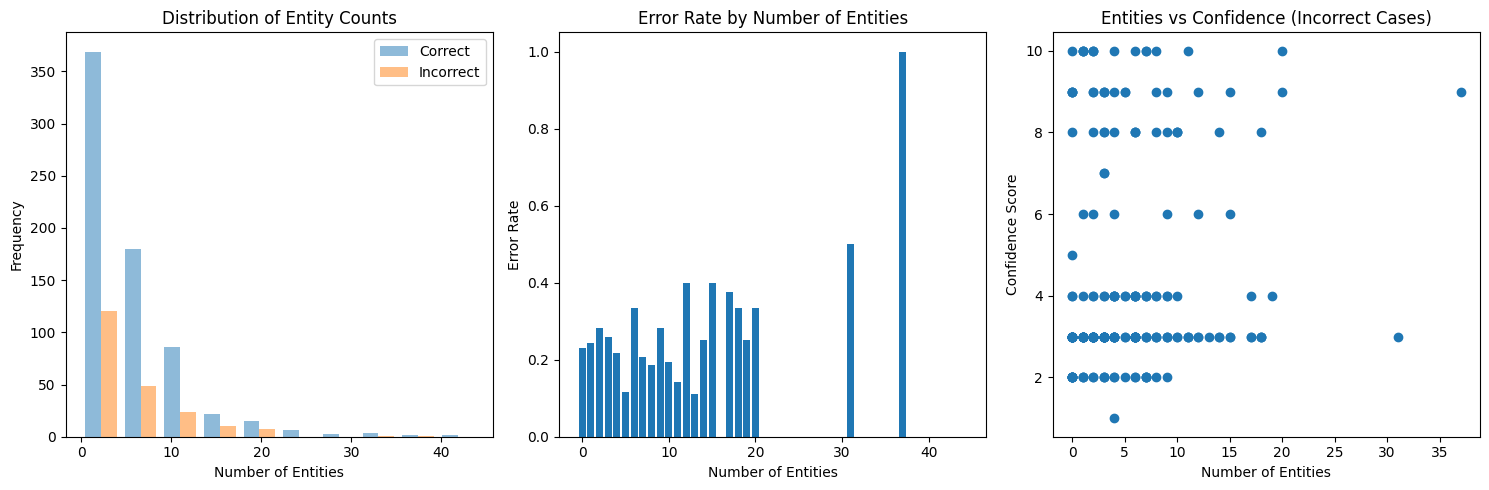


4. Entity Analysis by Error Type:

Most Common Entities in False Positives (Predicted OOC when actually NOOC):
{'entity': 'B-LOC', 'word': 'A'}        7
{'entity': 'I-PER', 'word': '##i'}      6
{'entity': 'B-LOC', 'word': 'Ki'}       5
{'entity': 'I-LOC', 'word': '##i'}      4
{'entity': 'B-PER', 'word': 'Trump'}    4
Name: count, dtype: int64

Most Common Entities in False Negatives (Predicted NOOC when actually OOC):
{'entity': 'B-PER', 'word': 'Trump'}       5
{'entity': 'B-LOC', 'word': 'Colorado'}    3
{'entity': 'I-PER', 'word': '##frey'}      3
{'entity': 'B-PER', 'word': 'Win'}         3
{'entity': 'B-PER', 'word': 'Cruz'}        3
Name: count, dtype: int64

5. Analysis of High-confidence Errors (>= 8):
Number of high-confidence errors: 48

Most Common Entities in High-confidence Errors:
{'entity': 'B-LOC', 'word': 'A'}             3
{'entity': 'B-PER', 'word': 'Trump'}         3
{'entity': 'I-PER', 'word': '##frey'}        3
{'entity': 'B-PER', 'word': 'Win'}           3
{'e

In [287]:
def analyze_entities_in_errors(df):
    print("=== Analysis of Entities in Incorrect Predictions ===")
    
    # Create mask for incorrect predictions and add num_entities column first
    incorrect_mask = df['ground_truth'] != df['predicted']
    df_analysis = df.copy()  # Create a copy to avoid modifying original
    df_analysis['num_entities'] = df_analysis['entities'].apply(len)
    incorrect_df = df_analysis[incorrect_mask].copy()
    
    # 1. Basic entity statistics
    print("\n1. Basic Entity Statistics:")
    entity_counts_incorrect = incorrect_df['entities'].apply(len)
    entity_counts_correct = df_analysis[~incorrect_mask]['entities'].apply(len)
    
    print(f"Total incorrect predictions: {len(incorrect_df)} out of {len(df_analysis)} total cases")
    print(f"Average entities in incorrect cases: {entity_counts_incorrect.mean():.2f}")
    print(f"Average entities in correct cases: {entity_counts_correct.mean():.2f}")
    print(f"Max entities in incorrect cases: {entity_counts_incorrect.max()}")
    print(f"Max entities in correct cases: {entity_counts_correct.max()}")
    
    # 2. Most common entities in incorrect cases
    incorrect_entities = []
    for entity_list in incorrect_df['entities']:
        incorrect_entities.extend(entity_list)
    
    entity_frequency = pd.Series(incorrect_entities).value_counts()
    print("\n2. Most Common Entities in Incorrect Cases:")
    print(entity_frequency.head(10))
    
    # 3. Error rate by number of entities
    error_rates_by_entity_count = {}
    
    for count in sorted(df_analysis['num_entities'].unique()):
        subset = df_analysis[df_analysis['num_entities'] == count]
        error_rate = (subset['ground_truth'] != subset['predicted']).mean()
        n_samples = len(subset)
        error_rates_by_entity_count[count] = (error_rate, n_samples)
    
    print("\n3. Error Rates by Number of Entities:")
    for count, (rate, n_samples) in error_rates_by_entity_count.items():
        print(f"Entities: {count}, Error Rate: {rate:.3f}, Samples: {n_samples}")
    
    # 4. Visualizations
    plt.figure(figsize=(15, 5))
    
    # Entity count distribution
    plt.subplot(1, 3, 1)
    plt.hist([entity_counts_correct, entity_counts_incorrect], 
             label=['Correct', 'Incorrect'], bins=10, alpha=0.5)
    plt.title('Distribution of Entity Counts')
    plt.xlabel('Number of Entities')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Error rate vs entity count
    plt.subplot(1, 3, 2)
    counts = list(error_rates_by_entity_count.keys())
    rates = [x[0] for x in error_rates_by_entity_count.values()]
    plt.bar(counts, rates)
    plt.title('Error Rate by Number of Entities')
    plt.xlabel('Number of Entities')
    plt.ylabel('Error Rate')
    
    # Entity count vs confidence score
    plt.subplot(1, 3, 3)
    plt.scatter(incorrect_df['num_entities'], incorrect_df['confidence_score'])
    plt.title('Entities vs Confidence (Incorrect Cases)')
    plt.xlabel('Number of Entities')
    plt.ylabel('Confidence Score')
    
    plt.tight_layout()
    plt.show()
    
    # 5. Analysis of false positives vs false negatives
    fp_mask = (df_analysis['ground_truth'] == 0) & (df_analysis['predicted'] == 1)
    fn_mask = (df_analysis['ground_truth'] == 1) & (df_analysis['predicted'] == 0)
    
    fp_entities = []
    fn_entities = []
    
    for entity_list in df_analysis[fp_mask]['entities']:
        fp_entities.extend(entity_list)
    for entity_list in df_analysis[fn_mask]['entities']:
        fn_entities.extend(entity_list)
        
    print("\n4. Entity Analysis by Error Type:")
    print("\nMost Common Entities in False Positives (Predicted OOC when actually NOOC):")
    if fp_entities:
        print(pd.Series(fp_entities).value_counts().head(5))
    else:
        print("No false positives found")
        
    print("\nMost Common Entities in False Negatives (Predicted NOOC when actually OOC):")
    if fn_entities:
        print(pd.Series(fn_entities).value_counts().head(5))
    else:
        print("No false negatives found")
    
    # 6. High confidence errors analysis
    high_conf_errors = incorrect_df[incorrect_df['confidence_score'] >= 8]
    print(f"\n5. Analysis of High-confidence Errors (>= 8):")
    print(f"Number of high-confidence errors: {len(high_conf_errors)}")
    
    if len(high_conf_errors) > 0:
        high_conf_entities = []
        for entity_list in high_conf_errors['entities']:
            high_conf_entities.extend(entity_list)
        
        high_conf_entity_freq = pd.Series(high_conf_entities).value_counts()
        print("\nMost Common Entities in High-confidence Errors:")
        print(high_conf_entity_freq.head(5))
        
        print(f"\nAverage entities in high-confidence errors: {high_conf_errors['num_entities'].mean():.2f}")

# Run the analysis
analyze_entities_in_errors(df)

# Additional analysis for entity patterns
def analyze_entity_patterns(df):
    print("\n=== Entity Pattern Analysis ===")
    
    df_analysis = df.copy()
    df_analysis['num_entities'] = df_analysis['entities'].apply(len)
    
    # Calculate the correlation between number of entities and confidence score
    correlation = df_analysis['num_entities'].corr(df_analysis['confidence_score'])
    print(f"\nCorrelation between number of entities and confidence score: {correlation:.3f}")
    
    # Analyze error rates for different ranges of entity counts
    df_analysis['entity_range'] = pd.cut(df_analysis['num_entities'], 
                                       bins=[-float('inf'), 1, 2, 3, float('inf')],
                                       labels=['0-1', '2', '3', '4+'])
    
    print("\nError rates by entity count range:")
    for range_label in df_analysis['entity_range'].unique():
        mask = df_analysis['entity_range'] == range_label
        subset = df_analysis[mask]
        error_rate = (subset['ground_truth'] != subset['predicted']).mean()
        print(f"Range {range_label}: {error_rate:.3f} (n={len(subset)})")

# Run the additional analysis
analyze_entity_patterns(df)